# Color Correction Testing

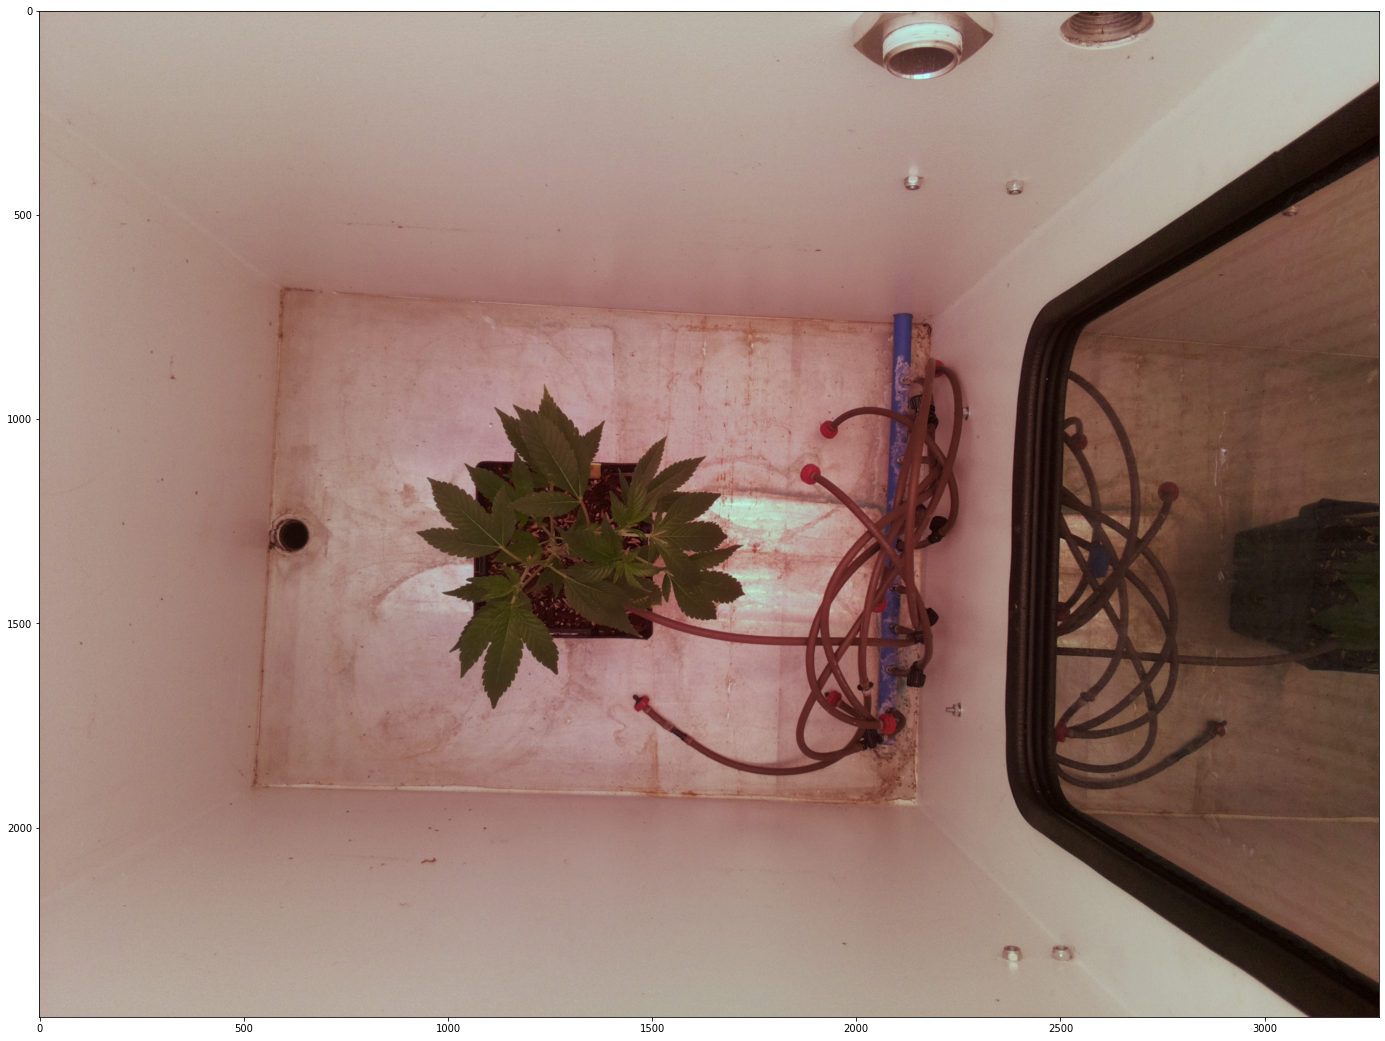

In [63]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot
from ipywidgets import interact
import ipywidgets as widgets

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 20]

os.chdir("F:/Pi12C")
image = cv.imread("./1-18-2022 18_0.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image[:, :, 0] = image[:, :, 0] - image[:, :, 0]**0.75

# image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
pyplot.imshow(image)

## Filtering

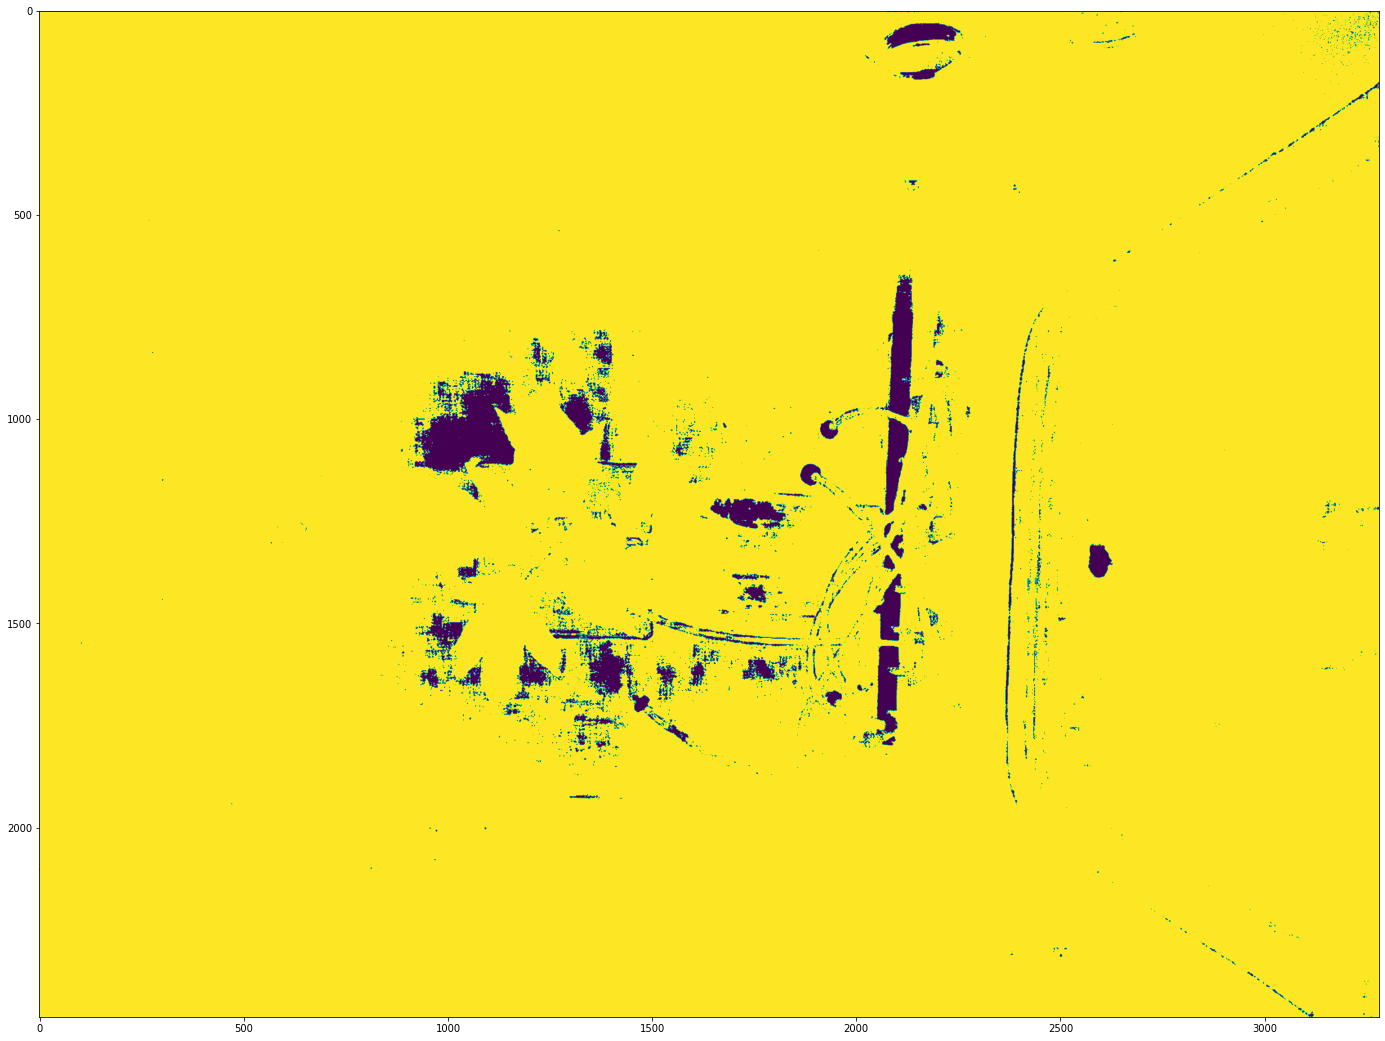

In [65]:
def showRange(image, lower, upper):
    image = cv.cvtColor(cv.cvtColor(image, cv.COLOR_RGB2BGR), cv.COLOR_BGR2HSV)
    (imageH, _, _) = cv.split(image)
    imageH = cv.inRange(imageH, lower, upper)
    pyplot.imshow(imageH)
lowerWidget = widgets.IntSlider(0, max(image[:, :, 0]))
upperWidget = widgets.IntSlider(0, max(image[:, :, 0]))
interact()

In [ ]:
pixelCount = np.sum(imageH != 0)
print(pixelCount)

148177


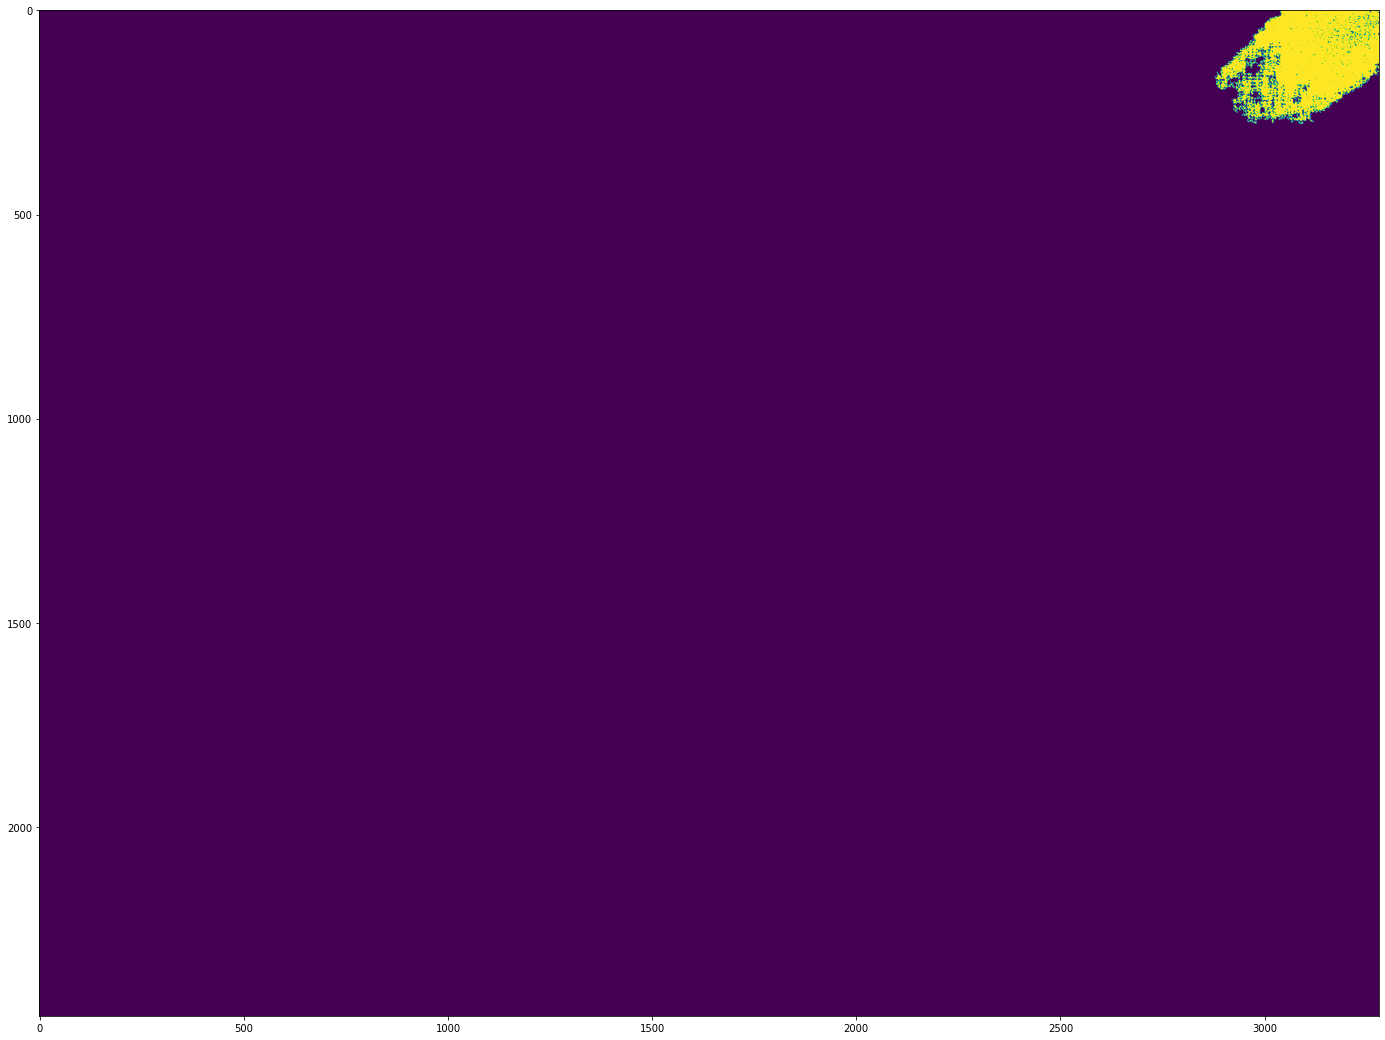

In [ ]:
(_, elementLabels, elementStats, _) = cv.connectedComponentsWithStats(imageH, 8)
elementLabels = elementLabels[1:]
elementStats = elementStats[1:]
biggestElementLocation = np.where(elementStats[1:, 4] == max(elementStats[1:, 4]))[0][0] + 2
elementLabels[elementLabels != biggestElementLocation] = 0
elementLabels = elementLabels/biggestElementLocation
interestingPixels = np.sum(elementLabels != 0)
pyplot.imshow(elementLabels)

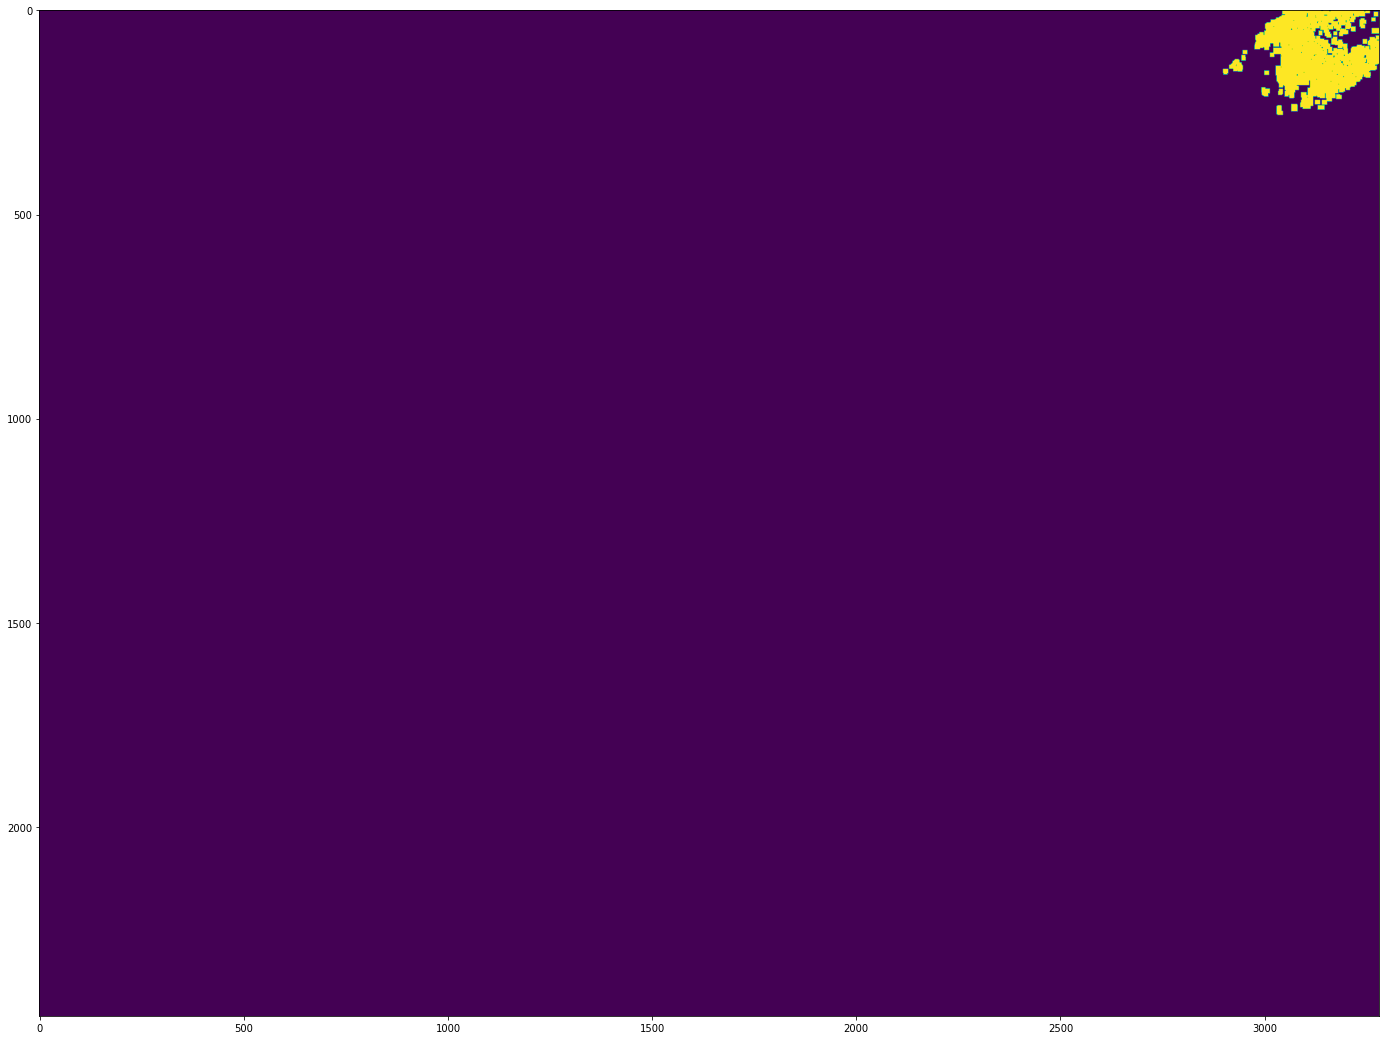

In [ ]:
kernel = np.ones((10,10), np.uint8)
elementLabels = cv.dilate(cv.erode(elementLabels, kernel), kernel)
pyplot.imshow(elementLabels)